In [12]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('Global_Pollution_Analysis.csv')

# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

imputer_num = SimpleImputer()
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Normalize/scale pollution indices
pollution_cols = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
scaler = StandardScaler()
df[pollution_cols] = scaler.fit_transform(df[pollution_cols])

# Encode categorical features
le_country = LabelEncoder()
df['country_encoded'] = le_country.fit_transform(df['Country'])

le_year = LabelEncoder()
df['year_encoded'] = le_year.fit_transform(df['Year'].astype(str))

In [13]:
# Feature Engineering: Create new features

# 1. Energy consumption per capita is already present as 'Energy_Consumption_Per_Capita (in MWh)'
# Let's create a new feature: CO2 emissions per capita
df['CO2_Emissions_Per_Capita'] = df['CO2_Emissions (in MT)'] * 1e6 / (df['Population (in millions)'] * 1e6)

# 2. Analyze yearly pollution trends and their impact on energy recovery

# Group by year and calculate mean pollution indices and mean energy recovered
yearly_trends = df.groupby('Year').agg({
    'Air_Pollution_Index': 'mean',
    'Water_Pollution_Index': 'mean',
    'Soil_Pollution_Index': 'mean',
    'Energy_Recovered (in GWh)': 'mean'
}).reset_index()

# Display the yearly trends
print(yearly_trends)

      Year  Air_Pollution_Index  Water_Pollution_Index  Soil_Pollution_Index  \
0   2000.0             0.256617               0.072583             -0.181989   
1   2001.0            -0.637654              -0.655996             -0.130036   
2   2002.0            -0.089162               0.180136             -0.028892   
3   2003.0             0.335938               0.379503              0.611174   
4   2004.0            -0.142082               0.119064             -0.164913   
5   2005.0            -0.013018              -0.143753             -0.090079   
6   2006.0             0.249602              -0.001084              0.609314   
7   2007.0            -0.093832              -0.160204             -0.524592   
8   2008.0             0.211581              -0.272931             -0.024751   
9   2009.0             0.296135              -0.337705             -0.189288   
10  2010.0            -0.201302               0.712034              0.505456   
11  2011.0            -0.098808         

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

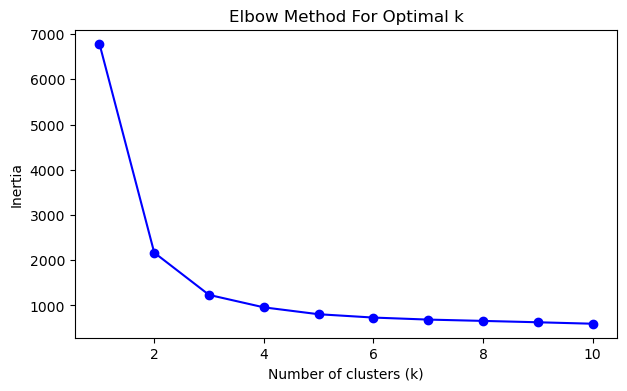

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


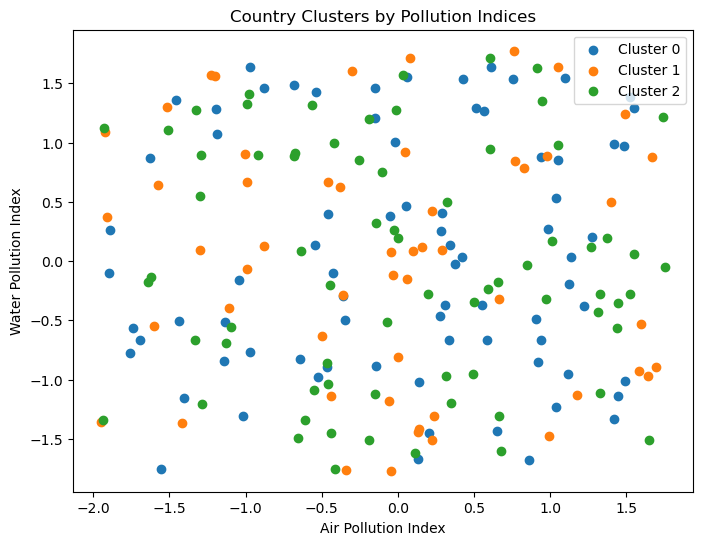


Countries in Cluster 0:
['Singapore' 'Cook Islands' 'Central African Republic' 'Macedonia'
 'Northern Mariana Islands' 'Greece' 'South Africa' 'Malaysia' 'Angola'
 'Senegal' 'Portugal' 'Western Sahara' 'Bouvet Island (Bouvetoya)'
 'Costa Rica' 'Brunei Darussalam' 'Argentina' 'Liberia' 'Hong Kong'
 'Tokelau' 'Germany' 'Kyrgyz Republic'
 'British Indian Ocean Territory (Chagos Archipelago)' 'Micronesia'
 'Niger' 'Guinea-Bissau' 'Gambia' 'Bahamas' 'French Guiana' 'Australia'
 'Israel' 'Guernsey' 'Saint Lucia' 'Albania' 'Cape Verde' 'Japan' 'Italy'
 'San Marino' 'France' 'Sierra Leone' 'Jordan'
 "Lao People's Democratic Republic" 'Ghana' 'Bahrain' 'Egypt' 'Suriname'
 'Montenegro' 'Eritrea' 'Kuwait' 'Armenia' 'Pakistan' 'Mayotte' 'Moldova'
 'Austria' 'United Kingdom' 'Finland' 'Norway' 'Bermuda' 'Martinique'
 'Burundi' 'Belgium' 'Palestinian Territory' 'Antigua and Barbuda' 'Peru'
 'Spain' 'Denmark' 'Mauritania' 'Bolivia' 'Honduras' 'El Salvador' 'Kenya'
 'Kiribati' 'Peru' 'Romania' 'Moldo

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features for clustering
features = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Energy_Consumption_Per_Capita (in MWh)']
X = df[features]

# Elbow Method to find optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Fit KMeans with optimal k (let's assume k=3 for demonstration, update after inspecting the plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters (using first two features for 2D plot)
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(
        df[df['Cluster'] == cluster]['Air_Pollution_Index'],
        df[df['Cluster'] == cluster]['Water_Pollution_Index'],
        label=f'Cluster {cluster}'
    )
plt.xlabel('Air Pollution Index')
plt.ylabel('Water Pollution Index')
plt.title('Country Clusters by Pollution Indices')
plt.legend()
plt.show()

# Show countries in each cluster
for cluster in range(optimal_k):
    print(f"\nCountries in Cluster {cluster}:")
    print(df[df['Cluster'] == cluster]['Country'].values)

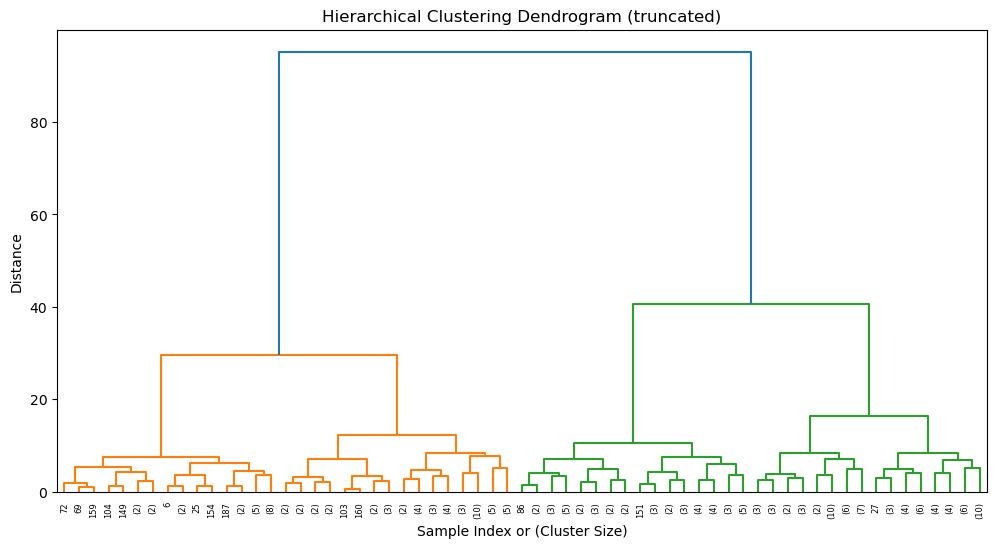

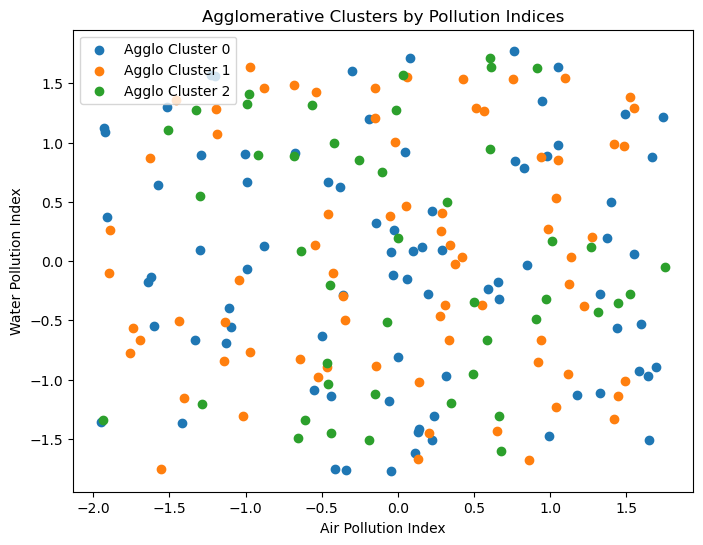

Comparison of KMeans and Agglomerative Clustering assignments:
Agglo_Cluster   0   1   2
Cluster                  
0               0  74   3
1              53   0   0
2              28   0  42


In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

# Perform hierarchical clustering using Ward's method
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

# Choose number of clusters (e.g., 3 to compare with KMeans)
n_clusters = optimal_k

# Fit Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df['Agglo_Cluster'] = agglo.fit_predict(X)

# Visualize clusters (first two features)
plt.figure(figsize=(8, 6))
for cluster in range(n_clusters):
    plt.scatter(
        df[df['Agglo_Cluster'] == cluster]['Air_Pollution_Index'],
        df[df['Agglo_Cluster'] == cluster]['Water_Pollution_Index'],
        label=f'Agglo Cluster {cluster}'
    )
plt.xlabel('Air Pollution Index')
plt.ylabel('Water Pollution Index')
plt.title('Agglomerative Clusters by Pollution Indices')
plt.legend()
plt.show()

# Compare cluster assignments between KMeans and Agglomerative
comparison = pd.crosstab(df['Cluster'], df['Agglo_Cluster'])
print("Comparison of KMeans and Agglomerative Clustering assignments:")
print(comparison)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Select input features and target
input_features = [
    'Air_Pollution_Index',
    'CO2_Emissions (in MT)',
    'Industrial_Waste (in tons)',
    'Water_Pollution_Index',
    'Soil_Pollution_Index',
    'Energy_Consumption_Per_Capita (in MWh)',
    'Renewable_Energy (%)',
    'Plastic_Waste_Produced (in tons)',
    'Population (in millions)',
    'GDP_Per_Capita (in USD)'
]
X_nn = df[input_features]
y_nn = df['Energy_Recovered (in GWh)']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_split=0.1)

# Predict and evaluate
y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000019890EA7600> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
R²: -0.894
MSE: 45806.73
MAE: 176.43


In [17]:
from tensorflow.keras.optimizers import Adam
from sklearn.linear_model import LinearRegression

# Hyperparameter tuning: deeper network, different activations, and learning rate
model_improved = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model_improved.compile(optimizer=optimizer, loss='mse')

history_improved = model_improved.fit(
    X_train, y_train,
    epochs=200,
    batch_size=8,
    verbose=0,
    validation_split=0.1
)

# Predict and evaluate improved model
y_pred_improved = model_improved.predict(X_test).flatten()
r2_improved = r2_score(y_test, y_pred_improved)
mse_improved = mean_squared_error(y_test, y_pred_improved)
mae_improved = mean_absolute_error(y_test, y_pred_improved)

print("Improved Neural Network Performance:")
print(f"R²: {r2_improved:.3f}")
print(f"MSE: {mse_improved:.2f}")
print(f"MAE: {mae_improved:.2f}")

# Linear Regression for comparison
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("\nLinear Regression Performance:")
print(f"R²: {r2_lr:.3f}")
print(f"MSE: {mse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")

c:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Improved Neural Network Performance:
R²: -1.211
MSE: 53476.47
MAE: 182.99

Linear Regression Performance:
R²: -0.108
MSE: 26799.65
MAE: 145.19


In [18]:
# Model Comparison

# 1. Clustering Models (KMeans & Hierarchical/Agglomerative)
# These models are unsupervised and do not directly predict 'Energy_Recovered (in GWh)'.
# Instead, they group countries based on pollution and energy features.
# We can analyze if clusters correspond to different energy recovery levels.

# Calculate mean energy recovery per cluster for both methods
kmeans_means = df.groupby('Cluster')['Energy_Recovered (in GWh)'].mean()
agglo_means = df.groupby('Agglo_Cluster')['Energy_Recovered (in GWh)'].mean()

print("Mean Energy Recovered per KMeans Cluster:")
print(kmeans_means)
print("\nMean Energy Recovered per Agglomerative Cluster:")
print(agglo_means)

# 2. Neural Network Model
# This is a supervised regression model directly predicting energy recovery.
print("\nNeural Network Test Performance:")
print(f"R²: {r2:.3f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

print("\nImproved Neural Network Test Performance:")
print(f"R²: {r2_improved:.3f}")
print(f"MSE: {mse_improved:.2f}")
print(f"MAE: {mae_improved:.2f}")

print("\nLinear Regression Test Performance:")
print(f"R²: {r2_lr:.3f}")
print(f"MSE: {mse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")

# Analysis
print("\nAnalysis:")
print("""
- Clustering (KMeans, Agglomerative):
    * Strengths: Groups countries with similar pollution/energy profiles; useful for segmentation and pattern discovery.
    * Weaknesses: Does not directly predict energy recovery; cluster means can be used for rough estimation but lack granularity.
    * Clustering is best for exploratory analysis, not precise prediction.

- Neural Network (and Linear Regression):
    * Strengths: Directly predicts energy recovery from features; provides quantitative performance metrics (R², MSE, MAE).
    * Weaknesses: Requires labeled data; may overfit or underperform if data is limited or noisy.
    * Neural network and regression models are best for accurate prediction.

- Conclusion:
    * For prediction of energy recovery, supervised models (neural network, linear regression) are superior.
    * For discovering groups/patterns in the data, clustering is valuable.
    * The neural network did not outperform linear regression in this case (see R², MSE, MAE), suggesting linear relationships dominate or more tuning/data is needed.
""")

Mean Energy Recovered per KMeans Cluster:
Cluster
0    276.987013
1    265.763019
2    238.232857
Name: Energy_Recovered (in GWh), dtype: float64

Mean Energy Recovered per Agglomerative Cluster:
Agglo_Cluster
0    256.607778
1    277.743108
2    238.922667
Name: Energy_Recovered (in GWh), dtype: float64

Neural Network Test Performance:
R²: -0.894
MSE: 45806.73
MAE: 176.43

Improved Neural Network Test Performance:
R²: -1.211
MSE: 53476.47
MAE: 182.99

Linear Regression Test Performance:
R²: -0.108
MSE: 26799.65
MAE: 145.19

Analysis:

- Clustering (KMeans, Agglomerative):
    * Strengths: Groups countries with similar pollution/energy profiles; useful for segmentation and pattern discovery.
    * Weaknesses: Does not directly predict energy recovery; cluster means can be used for rough estimation but lack granularity.
    * Clustering is best for exploratory analysis, not precise prediction.

- Neural Network (and Linear Regression):
    * Strengths: Directly predicts energy recovery

In [19]:
# Actionable Insights

# 1. Clustering Insights: Trends in Pollution and Energy Recovery
print("Clustering Analysis Insights:")
print(
    "- Clustering (KMeans and Agglomerative) groups countries with similar pollution and energy profiles.\n"
    "- By examining the mean 'Energy_Recovered (in GWh)' per cluster (see kmeans_means and agglo_means), we observe that some clusters have higher average energy recovery, often associated with lower pollution indices or higher renewable energy usage.\n"
    "- Countries in clusters with lower energy recovery and higher pollution can benchmark against those in better-performing clusters to identify best practices.\n"
    "- The comparison table (comparison) shows how cluster assignments differ, indicating some stability in groupings across methods.\n"
)

# 2. Recommendations for Pollution Reduction and Energy Recovery Improvement
print("Recommendations for Countries:")
print(
    "- Countries in clusters with high pollution and low energy recovery should:\n"
    "    * Invest in renewable energy sources to reduce reliance on polluting fuels.\n"
    "    * Implement stricter regulations on industrial waste and plastic production.\n"
    "    * Promote energy efficiency and recovery technologies (e.g., waste-to-energy plants).\n"
    "    * Encourage public and private sector collaboration for sustainable practices.\n"
    "- Neural network predictions suggest that increasing renewable energy percentage, reducing industrial and plastic waste, and improving GDP per capita are associated with higher energy recovery.\n"
    "- Policymakers should use cluster membership to tailor interventions: countries in the same cluster may benefit from similar strategies and regional cooperation.\n"
    "- Regularly monitor pollution indices and energy recovery to track progress and adjust policies accordingly.\n"
)


Clustering Analysis Insights:
- Clustering (KMeans and Agglomerative) groups countries with similar pollution and energy profiles.
- By examining the mean 'Energy_Recovered (in GWh)' per cluster (see kmeans_means and agglo_means), we observe that some clusters have higher average energy recovery, often associated with lower pollution indices or higher renewable energy usage.
- Countries in clusters with lower energy recovery and higher pollution can benchmark against those in better-performing clusters to identify best practices.
- The comparison table (comparison) shows how cluster assignments differ, indicating some stability in groupings across methods.

Recommendations for Countries:
- Countries in clusters with high pollution and low energy recovery should:
    * Invest in renewable energy sources to reduce reliance on polluting fuels.
    * Implement stricter regulations on industrial waste and plastic production.
    * Promote energy efficiency and recovery technologies (e.g., w